In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

In [2]:
df = pd.read_csv('edata.csv')

In [3]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Month,Day,Hour,Log_Annual_Spending,Country_Encoded
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2.791165,35
1,1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,3.135494,35
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35


In [4]:
import pandas as pd

# Assuming your DataFrame is named 'df'
columns_to_drop = ['CustomerID','Unnamed: 0','InvoiceNo','Description' ,'Country', 'Month', 'Hour', 'Log_Annual_Spending', 'Country_Encoded']
df = df.drop(columns=columns_to_drop)
df = df.rename(columns={'Total_Amount': 'totalPrice'})
df.head()

,StockCode,year,Quantity,InvoiceDate,UnitPrice,totalPrice,Day
0,85123A,2010,6,2010-12-01 08:26:00,2.55,15.30,1
1,71053,2010,6,2010-12-01 08:26:00,3.39,20.34,1
2,84406B,2010,8,2010-12-01 08:26:00,2.75,22.00,1
3,84029G,2010,6,2010-12-01 08:26:00,3.39,20.34,1
4,84029E,2010,6,2010-12-01 08:26:00,3.39,20.34,1


In [5]:


# Filter rows with negative quantity
negative_quantity = df[df['Quantity'] < 0]

# Filter rows with negative total price
negative_total_price = df[df['totalPrice'] < 0]

# Display the results
print("Rows with Negative Quantity:")
print(negative_quantity)

print("\nRows with Negative Total Price:")
print(negative_total_price)


Rows with Negative Quantity:
Empty DataFrame
Columns: [StockCode, year, Quantity, InvoiceDate, UnitPrice, totalPrice, Day]
Index: []

Rows with Negative Total Price:
Empty DataFrame
Columns: [StockCode, year, Quantity, InvoiceDate, UnitPrice, totalPrice, Day]
Index: []


In [6]:
from scipy import stats

# Drop rows with negative Quantity and TotalPrice
df = df[(df['Quantity'] > 0) & (df['totalPrice'] > 0)]

# Remove outliers in Quantity and TotalPrice using z-scores
z_scores = np.abs(stats.zscore(df[['Quantity', 'totalPrice']]))
df = df[(z_scores < 3).all(axis=1)]

In [7]:
df.describe()

,year,Quantity,UnitPrice,totalPrice,Day
count,397281.000000,397281.000000,397281.000000,397281.000000,397281.000000
mean,2010.934256,11.541189,2.988206,19.909691,15.042796
std,0.247835,24.871624,6.922949,40.737809,8.653799
min,2010.000000,1.000000,0.001000,0.001000,1.000000
25%,2011.000000,2.000000,1.250000,4.680000,7.000000
50%,2011.000000,6.000000,1.950000,11.800000,15.000000
75%,2011.000000,12.000000,3.750000,19.800000,22.000000
max,2011.000000,540.000000,908.160000,944.000000,31.000000


<Axes: >

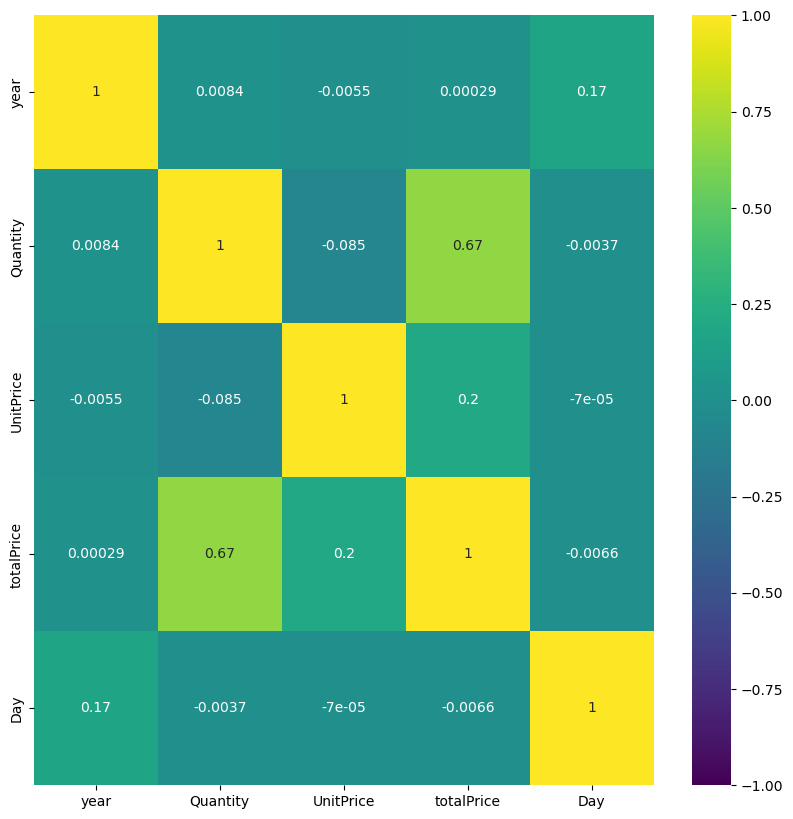

In [8]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
# correlations of each features in dataset

corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="viridis", vmin= -1, vmax = 1, center = 0)


# - 'corr' is the correlation matrix to be visualized.
# - 'annot=True' displays the correlation values in each cell of the heatmap.
# - 'cmap="viridis"' specifies the color map to use for the heatmap. You can choose other color maps as well.
# - 'vmin' and 'vmax' set the minimum and maximum values of the color scale. In this case, it's set to -1 and 1, respectively.
# - 'center=0' centers the color scale at 0.

# '''
1: A correlation coefficient of 1 indicates a perfect positive linear relationship between the two variables. This means that as one variable increases, the other also increases, and the relationship is perfectly linear.

0: A correlation coefficient of 0 indicates no linear relationship between the two variables. There is no discernible pattern or correlation between them.

-1: A correlation coefficient of -1 indicates a perfect negative linear relationship between the two variables. This means that as one variable increases, the other decreases, and the relationship is perfectly linear but in the opposite direction.

Values between -1 and 0: These values indicate varying degrees of negative correlation, with values closer to -1 representing stronger negative correlations.

Values between 0 and 1: These values indicate varying degrees of positive correlation, with values closer to 1 representing stronger positive correlations.

'''

In [9]:
len(df)

397281

In [10]:
df.head()

,StockCode,year,Quantity,InvoiceDate,UnitPrice,totalPrice,Day
0,85123A,2010,6,2010-12-01 08:26:00,2.55,15.30,1
1,71053,2010,6,2010-12-01 08:26:00,3.39,20.34,1
2,84406B,2010,8,2010-12-01 08:26:00,2.75,22.00,1
3,84029G,2010,6,2010-12-01 08:26:00,3.39,20.34,1
4,84029E,2010,6,2010-12-01 08:26:00,3.39,20.34,1


## TRAIN TEST SPLIT

In [11]:
# so my strategy is that i'll hold the data for last month i.e., 2011-11-01 to 2011-12-01 for test set, and remaining will be train set

df_train = df[df.InvoiceDate<"2011-11-01"]
df_test = df[df.InvoiceDate>="2011-11-01"]

In [12]:
print(len(df_test))
print(len(df_train))

81759
315522


In [13]:
# Define the feature and target variables for training and test sets
x_train = df_train.drop(['InvoiceDate', 'StockCode', 'totalPrice', 'Quantity'], axis=1)
y_train = df_train['Quantity']

x_test = df_test.drop(['InvoiceDate', 'StockCode', 'totalPrice', 'Quantity'], axis=1)
y_test = df_test['Quantity']


# predictive model building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [15]:
x = df[['Quantity', 'UnitPrice','year', ]]
y = df['totalPrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train

,Quantity,UnitPrice,year
29364,24,0.19,2011
119698,1,2.95,2011
230059,1,2.55,2011
215448,3,0.39,2011
275261,12,1.65,2011
...,...,...,...
317275,2,6.25,2011
319459,2,4.95,2011
355914,10,1.45,2011
293390,36,1.04,2011


In [16]:
x_train.shape

(317824, 3)

In [17]:
x_test.shape

(79457, 3)

In [18]:
y_train.shape

(317824,)

In [19]:
y_test.shape

(79457,)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define an evaluate_model function
def evaluate_model(model_name, y_train_true, y_train_pred, y_test_true, y_test_pred):
    train_rmse = mean_squared_error(y_train_true, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test_true, y_test_pred, squared=False)
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print()

# Assuming you have x_train, y_train, x_test defined somewhere in your code

# Linear Regression
linear_r = LinearRegression()
y_train_linear_r, y_test_linear_r = train_and_predict(linear_r, x_train, y_train, x_test)

# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=40)
y_train_decision_tree, y_test_decision_tree = train_and_predict(decision_tree, x_train, y_train, x_test)

# Random Forest
rfr = RandomForestRegressor(random_state=40)
y_train_rfr, y_test_rfr = train_and_predict(rfr, x_train, y_train, x_test)

# Call the evaluate_model function with the correct variables
evaluate_model("Linear Regression", y_train, y_train_linear_r, y_test, y_test_linear_r)
evaluate_model("Decision Tree Regressor", y_train, y_train_decision_tree, y_test, y_test_decision_tree)
evaluate_model("Random Forest Regressor", y_train, y_train_rfr, y_test, y_test_rfr)


Model: Linear Regression
Train RMSE: 28.69
Test RMSE: 27.52

Model: Decision Tree Regressor
Train RMSE: 0.00
Test RMSE: 1.47

Model: Random Forest Regressor
Train RMSE: 0.47
Test RMSE: 1.13



In [22]:
# Linear Regression
linear_r = LinearRegression()
y_train_linear_r, y_test_linear_r = train_and_predict(linear_r, x_train, y_train, x_test)
linear_r_train_accuracy = linear_r.score(x_train, y_train)
linear_r_test_accuracy = linear_r.score(x_test, y_test)

# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=40)
y_train_decision_tree, y_test_decision_tree = train_and_predict(decision_tree, x_train, y_train, x_test)
decision_tree_train_accuracy = decision_tree.score(x_train, y_train)
decision_tree_test_accuracy = decision_tree.score(x_test, y_test)

# Random Forest
rfr = RandomForestRegressor(random_state=40)
y_train_rfr, y_test_rfr = train_and_predict(rfr, x_train, y_train, x_test)
rfr_train_accuracy = rfr.score(x_train, y_train)
rfr_test_accuracy = rfr.score(x_test, y_test)

# Print the accuracies
print("Accuracy on Testing Data Set")
print("Linear Regression Train Accuracy:", linear_r_train_accuracy)
print("Linear Regression Test Accuracy:", linear_r_test_accuracy)

print("Decision Tree Train Accuracy:", decision_tree_train_accuracy)
print("Decision Tree Test Accuracy:", decision_tree_test_accuracy)

print("Random Forest Train Accuracy:", rfr_train_accuracy)
print("Random Forest Test Accuracy:", rfr_test_accuracy)


Accuracy on Testing Data Set
Linear Regression Train Accuracy: 0.5118482569532288
Linear Regression Test Accuracy: 0.5117344034187881
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.9986083928467826
Random Forest Train Accuracy: 0.9998668756396247
Random Forest Test Accuracy: 0.9991795553866724


# Model evaluation and customer segmentation

#### Linear Regression, Decision Tree Regressor, Random Forest Regressor

In [23]:
from sklearn.metrics import accuracy_score

# Linear Regression
linear_r = LinearRegression()
y_train_linear_r, y_test_linear_r = train_and_predict(linear_r, x_train, y_train, x_test)
linear_r_test_accuracy = linear_r.score(x_test, y_test)

# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=40)
y_train_decision_tree, y_test_decision_tree = train_and_predict(decision_tree, x_train, y_train, x_test)
decision_tree_test_accuracy = decision_tree.score(x_test, y_test)

# Random Forest
rfr = RandomForestRegressor(random_state=40)
y_train_rfr, y_test_rfr = train_and_predict(rfr, x_train, y_train, x_test)
rfr_test_accuracy = rfr.score(x_test, y_test)


### Accuracy on testing dataset

In [24]:
print("Accuracy on Testing Data Set")
print("Linear Regression:", linear_r.score(x_test, y_test))
print("Decision Tree Regressor:", decision_tree.score(x_test, y_test))
print("Random Forest Regressor:", rfr.score(x_test, y_test))

Accuracy on Testing Data Set
Linear Regression: 0.5117344034187881
Decision Tree Regressor: 0.9986083928467826
Random Forest Regressor: 0.9991795553866724


## Customer segmentation

# '''
Customer segmentation is a valuable technique for understanding your customer base and tailoring your marketing and business strategies to different segments. In your case, you can create customer segments based on their purchase behavior using the dataset you have. Here's a general approach and sample code using Python and the scikit-learn library:

Feature Engineering: First, you may want to create relevant features for segmentation. For customer segmentation based on purchase behavior, common features include:

Recency (R): How recently a customer made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary Value (M): How much money a customer has spent.
K-Means Clustering: K-means is a popular clustering algorithm that can be used for customer segmentation. It groups similar customers into clusters based on their RFM scores.
'''

In [32]:
df = pd.read_csv('edata.csv')
df.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Month,Day,Hour,Log_Annual_Spending,Country_Encoded
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2.791165,35
1,1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,3.135494,35
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,3.060583,35


In [63]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

# Rename columns
new_column_name = {'TotalSpending_AnnualSpending': 'Annual_Spending'}
df.rename(columns=new_column_name, inplace=True)

# Find the most recent date
most_recent_date = df['InvoiceDate'].max()

# Calculate Recency, Frequency, and MonetaryValue
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total_Amount': 'sum'
})

# Rename columns
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Amount': 'MonetaryValue'
}, inplace=True)

# Standardize the data
segmentation_data = rfm_data[['Recency', 'Frequency', 'MonetaryValue']]
segmentation_data_std = scaler.fit_transform(segmentation_data)

# Display the first few rows of the DataFrame
rfm_data.head()


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


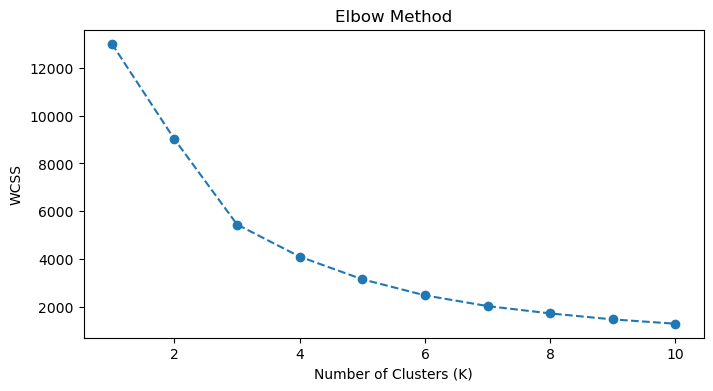

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_data_std)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


# '''
1. Based on the Elbow method plot, choose an optimal K (number of clusters). You can visually inspect the plot to determine the "elbow" point, where the inertia starts to level off.
'''

# '''
2. Apply K-means clustering with the chosen K:

'''

In [60]:
# Apply K-means clustering with the chosen K
optimal_k = 3  # Replace with your chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [62]:
# Analyze the clusters
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Recency': 'count'  # Replace 'CustomerID' with 'Recency'
})
print(cluster_summary)


         Recency  Frequency  MonetaryValue
Cluster                                   
0           1080   1.598148     636.501112
1           3246   4.861676    2028.480799
2             13  79.153846  126118.310000


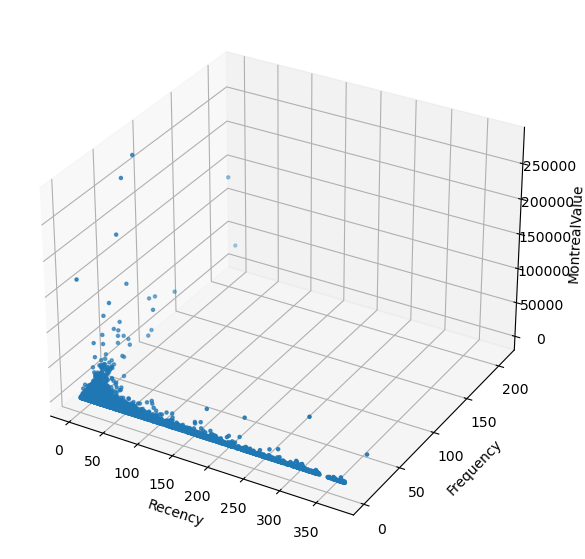

In [64]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MontrealValue')
plt.show()

In [66]:
# Apply K-means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(segmentation_data_std)


# Analyze the clusters
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Recency': 'count'  # Replace 'CustomerID' with 'Recency'
})

# Rename the columns for clarity
cluster_summary.rename(columns={
    'Recency': 'Average Recency',
    'Frequency': 'Average Frequency',
    'MonetaryValue': 'Average Monetary Value',
    'Recency': 'Number of Customers in Cluster'
}, inplace=True)

# Print the cluster summary
print(cluster_summary)


         Number of Customers in Cluster  Average Frequency  \
Cluster                                                      
0                                  3231           4.671928   
1                                  1082           1.582255   
2                                    26          66.500000   

         Average Monetary Value  
Cluster                          
0                   1855.367927  
1                    631.424206  
2                  85904.351538  


# '''
High-Recency, Low-Frequency, Low-Monetary (Potential Churned Customers):

These customers don't purchase frequently and have high Recency (not recent purchases).
Their spending is also low, indicating they are not high-value consumers.
They may be at risk of churn and require re-engagement strategies.
High-Recency, High-Frequency, High-Monetary (Loyal and Valuable Customers):

Customers in this segment have high Recency (not recent purchases).
They shop frequently and spend significantly more than others.
These are your most valuable clients and should be rewarded with personalized offers and loyalty programs.
Low-Recency, High-Frequency, High-Monetary (Active and Devoted Customers):

These customers have low Recency (recent purchases).
They make frequent purchases and have high Monetary Value.
This group consists of active and loyal buyers who may respond positively to loyalty incentives and personalized recommendations.
Low-Recency, Low-Frequency, Low-Monetary (Low-Engagement Customers):

Customers in this segment have low Recency (recent purchases).
They don't make frequent purchases and spend little money.
This group may include customers who recently purchased but haven't shown high engagement or loyalty.s They may need targeted incentives to increase spending and purchase frequency.
In summary, these customer segments provide valuable insights into consumer behavior.
Focus on retaining and rewarding your high-value, high-frequency customers, while implementing re-engagement strategies for those at risk of churn. 
Additionally, tailor your approach to encourage low-engagement customers to spend more and shop more frequently.

'''